## Class 03 - 24/11/2025

Standard NLP Pipeline:
- Clean Raw Texts
- Normalize
- Tokenize
- Remove Stopwords
- Part of Speach Tagging (matching words to a speech category [verbs, adjectives, nouns, proper nouns, conjunctions...])
- Named Entity Recognition (
- Stemming Lemamatization (technique to remove affixes from a word, keeping the stem, reducing the size of the index and increasing retrieval accuracy)

In [131]:
import re #for cleaning

import nltk
import spacy

text = "The rate increase today reflects the Governing Council’s assessment of the inflation outlook in light of the incoming economic and financial data, the dynamics of underlying inflation, and the strength of monetary policy transmission. The September ECB staff macroeconomic projections for the euro area see average inflation at 5.6% in 2023, 3.2% in 2024 and 2.1% in 2025. This is an upward revision for 2023 and 2024 and a downward revision for 2025. The upward revision for 2023 and 2024 mainly reflects a higher path for energy prices. Underlying price pressures remain high, even though most indicators have started to ease. ECB staff have slightly revised down the projected path for inflation excluding energy and food, to an average of 5.1% in 2023, 2.9% in 2024 and 2.2% in 2025. The Governing Council’s past interest rate increases continue to be transmitted forcefully. Financing conditions have tightened further and are increasingly dampening demand, which is an important factor in bringing inflation back to target. With the increasing impact of this tightening on domestic demand and the weakening international trade environment, ECB staff have lowered their economic growth projections significantly. They now expect the euro area economy to expand by 0.7% in 2023, 1.0% in 2024 and 1.5% in 2025."

no_number = re.sub("[^a-zA-Z]", " ", text)
print(no_number)

The rate increase today reflects the Governing Council s assessment of the inflation outlook in light of the incoming economic and financial data  the dynamics of underlying inflation  and the strength of monetary policy transmission  The September ECB staff macroeconomic projections for the euro area see average inflation at      in            in      and      in       This is an upward revision for      and      and a downward revision for       The upward revision for      and      mainly reflects a higher path for energy prices  Underlying price pressures remain high  even though most indicators have started to ease  ECB staff have slightly revised down the projected path for inflation excluding energy and food  to an average of      in            in      and      in       The Governing Council s past interest rate increases continue to be transmitted forcefully  Financing conditions have tightened further and are increasingly dampening demand  which is an important factor in bring

In [132]:
no_upper = no_number.lower()
print(no_upper)

the rate increase today reflects the governing council s assessment of the inflation outlook in light of the incoming economic and financial data  the dynamics of underlying inflation  and the strength of monetary policy transmission  the september ecb staff macroeconomic projections for the euro area see average inflation at      in            in      and      in       this is an upward revision for      and      and a downward revision for       the upward revision for      and      mainly reflects a higher path for energy prices  underlying price pressures remain high  even though most indicators have started to ease  ecb staff have slightly revised down the projected path for inflation excluding energy and food  to an average of      in            in      and      in       the governing council s past interest rate increases continue to be transmitted forcefully  financing conditions have tightened further and are increasingly dampening demand  which is an important factor in bring

In [133]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(no_upper)

from nltk.corpus import stopwords
stops = stopwords.words('english') #It is worth noting that stopwords might include words that could be relevant deppending on the context (e.g. "above")

tokens = [t for t in tokens if t not in stops]
print(tokens)

['rate', 'increase', 'today', 'reflects', 'governing', 'council', 'assessment', 'inflation', 'outlook', 'light', 'incoming', 'economic', 'financial', 'data', 'dynamics', 'underlying', 'inflation', 'strength', 'monetary', 'policy', 'transmission', 'september', 'ecb', 'staff', 'macroeconomic', 'projections', 'euro', 'area', 'see', 'average', 'inflation', 'upward', 'revision', 'downward', 'revision', 'upward', 'revision', 'mainly', 'reflects', 'higher', 'path', 'energy', 'prices', 'underlying', 'price', 'pressures', 'remain', 'high', 'even', 'though', 'indicators', 'started', 'ease', 'ecb', 'staff', 'slightly', 'revised', 'projected', 'path', 'inflation', 'excluding', 'energy', 'food', 'average', 'governing', 'council', 'past', 'interest', 'rate', 'increases', 'continue', 'transmitted', 'forcefully', 'financing', 'conditions', 'tightened', 'increasingly', 'dampening', 'demand', 'important', 'factor', 'bringing', 'inflation', 'back', 'target', 'increasing', 'impact', 'tightening', 'domesti

In [134]:
import spacy
from spacy import displacy

In [135]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(no_upper)
[(d.label_, d.text) for d in doc.ents]
displacy.render(doc,'ent', jupyter=True)

### Stemming

Different stemmers have different compression rates (rate of initial words to remaining stems)

In [136]:
from nltk.stem import SnowballStemmer, PorterStemmer, WordNetLemmatizer
snowball = SnowballStemmer('english')
snowball.stem("programmers")

'programm'

In [137]:
porter = PorterStemmer()
print(porter.stem("programmers"))

programm


### Lemmatization

In [138]:
wnl = WordNetLemmatizer()
print(wnl.lemmatize("programmers"))

programmer


---
### ECB All Speeches Dataset

In [139]:
import pandas as pd

path = "/Users/eduardo/Downloads/all_ECB_speeches.csv"

df = pd.read_csv(path, sep="|").dropna()

print(df.columns)
df.head()
df.tail()

Index(['date', 'speakers', 'title', 'subtitle', 'contents'], dtype='object')


,date,speakers,title,subtitle,contents
2952,1997-05-13,Alexandre Lamfalussy,The European Central Bank: independent and acc...,Keynote speech delivered by Alexandre Lamfalus...,The European Central Bank: independent and a...
2953,1997-04-30,Alexandre Lamfalussy,The operation of monetary policy in stage thre...,"Address by Alexandre Lamfalussy, President of ...",The operation of monetary policy in stage th...
2954,1997-04-22,Alexandre Lamfalussy,Convergence and the role of the European Centr...,"Remarks by Alexandre Lamfalussy, President of ...",Convergence and the role of the European Cen...
2955,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...
2956,1997-02-07,Alexandre Lamfalussy,Conference organised by the Hungarian Banking ...,"Address by Alexandre Lamfalussy, President of ...",Conference organised by the Hungarian Bankin...


### Compute N of Tokens

In [140]:
all_tokens = []

tokens_list = df['contents'].apply(word_tokenize).tolist()

[all_tokens.extend(tokens) for tokens in tokens_list]

len(all_tokens)

9845544

### Compute N of Unique Tokens


In [141]:
unique_tokens = len(set(all_tokens))
print(unique_tokens)

107519


### Simple Pre-processing

In [142]:
def simple_prepro(text):

    text = re.sub("[^a-zA-Z]", " ", text.lower())
    tokens = word_tokenize(text)

    return tokens

all_tokens_simple_prepro = []
df['simple_prepro'] = df['contents'].apply(simple_prepro)

print(len(df['simple_prepro'].explode().unique()))
print(len(df['simple_prepro'].explode().unique())/unique_tokens)

71689
0.6667565732568197


### Compute N of Tokens that appear only once


In [143]:
print((df['simple_prepro'].explode().value_counts()==1).sum()) #problematic to train a model if 1/3 of your unique tokens

26627


### Agressive Pre-processing


In [144]:
def agressive_prepro(text):

    text = re.sub("[^a-zA-Z]", " ", text.lower())
    tokens = word_tokenize(text)
    clean_tokens = [t for t in tokens if t not in stops]
    lemmas = [wnl.lemmatize(t) for t in clean_tokens]

    return lemmas

df['agressive_prepro'] = df['contents'].apply(agressive_prepro)

print(len(df['agressive_prepro'].explode().unique()))
print(len(df['agressive_prepro'].explode().unique())/unique_tokens)
print((df['agressive_prepro'].explode().value_counts()==1).sum())

67767
0.6302792994726514
25683


---
## Textual Analysis


Before 1990s, CB were "shrouded in mystery, and believed they should be"

- "If I turn out to be particularly clear, you've probably misunderstood what I've said."  […] "Since I’ve become a central banker, I’ve learned to mumble with great coherence," - Alan Greenspan

In 1996, Alan Blinder (Princeton, For Vice-Director of the FOMC) wrote:

- "By making itself more predictable to the markets, the central bank makes market reactions to monetary policy more predictable to itself. And that makes it possible to do a better job of managing the economy."

Central Bankers and Academics realised that central banking was about _managing expecations_ as much as _managing current interest rates_.

Textual analysis is used for 4 main objectives **(Loughran & McDonald, 2016)**:

- Readability
- Similarity
- Thematic structures
- Information content

Readability can be defined as "the quality of being easy and enjoyable to read" (Cambridge dictionary), or the "comprehension difficulty" (Flesch (1948)) of a document.


In [145]:
import readability
readability_scores = readability.getmeasures(text, "en")

readability_scores

OrderedDict([('readability grades',
              OrderedDict([('Kincaid', 83.68384615384616),
                           ('ARI', 107.61451923076922),
                           ('Coleman-Liau', 15.32192641346154),
                           ('FleschReadingEase', -134.43884615384613),
                           ('GunningFogIndex', 92.62307692307694),
                           ('LIX', 239.73076923076923),
                           ('SMOGIndex', 41.34057902536163),
                           ('RIX', 66.0),
                           ('DaleChallIndex', 17.452665384615386)])),
             ('sentence info',
              OrderedDict([('characters_per_word', 5.3173076923076925),
                           ('syll_per_word', 1.5384615384615385),
                           ('words_per_sentence', 208.0),
                           ('sentences_per_paragraph', 1.0),
                           ('type_token_ratio', 0.5961538461538461),
                           ('directspeech_ratio', 0.0),
     

### Similarity

Similarity, widely used in natural language processing, can be measured for words, sentences, group of sentences, documents or group of documents (corpus).

The literature differentiates:
- lexical: same sequence of characters
- semantic same meaning, used in the same context, opposites...



In [146]:
nlp = spacy.load('en_core_web_lg') # we get 0.44 in "en_core_web_sm"
#nlp = spacy.load('en_core_web_sm')

text1 = "We should increase taxes for the very rich."
text2 = "Decreasing taxes for our citizens is essential."

doc1 = nlp(text1)
doc2 = nlp(text2)
print("spaCy: ", doc1.similarity(doc2))

spaCy:  0.9165037947586905


---
### Task : Count the words that are related to negative economic situation (crisis, …)

Steps:
- 1) Import `df`
- 2) Pre-process `df`
- 3) Compute similarity of word "crisis" with other words
- 4) Build a lexicon of crisis-related words
- 5) Count the number of time they appear in each document


In [147]:
#steps 1 and 2 were already done
nlp = spacy.load("en_core_web_lg")  # model with word vectors

#frequency cutoff to avoid doing the process with the whole set of tokens
min_freq = 100

# frequency of each token
token_counts = df["agressive_prepro"].explode().value_counts()

# keep only tokens with count >= min_freq
freq_tokens = token_counts[token_counts >= min_freq].index.tolist()

print(f"Number of tokens with freq >= {min_freq}: {len(freq_tokens)}")

crisis_token = nlp("crisis")[0]

similarities = []
for w in freq_tokens:
    doc_w = nlp(w)
    token_w = doc_w[0]
    if token_w.has_vector:
        sim = crisis_token.similarity(token_w)
        similarities.append((w, sim))

# sort by similarity
similarities_sorted = sorted(similarities, key=lambda x: x[1], reverse=True)

similarities_sorted[:40]

Number of tokens with freq >= 100: 4585


[('crisis', 1.0),
 ('economic', 0.7357193827629089),
 ('turmoil', 0.729918360710144),
 ('recession', 0.728392481803894),
 ('downturn', 0.676943302154541),
 ('economy', 0.6725894212722778),
 ('disaster', 0.671986997127533),
 ('financial', 0.6547645926475525),
 ('situation', 0.6520633697509766),
 ('collapse', 0.6477344036102295),
 ('aftermath', 0.6100307703018188),
 ('conflict', 0.6055614948272705),
 ('eurozone', 0.5985537767410278),
 ('debt', 0.5936241149902344),
 ('exacerbated', 0.592684805393219),
 ('inevitable', 0.5869002342224121),
 ('worsening', 0.5845469832420349),
 ('dilemma', 0.5831577181816101),
 ('unemployment', 0.5776044726371765),
 ('reform', 0.5770813226699829),
 ('concern', 0.576464056968689),
 ('monetary', 0.5755210518836975),
 ('fiscal', 0.5687327980995178),
 ('government', 0.5682721734046936),
 ('political', 0.5677875876426697),
 ('inflation', 0.5674331784248352),
 ('uncertainty', 0.5609687566757202),
 ('intervention', 0.5494809746742249),
 ('slowdown', 0.54770827293396

### 4) Build a lexicon of crisis-related words

In [148]:
# keep words with similarity >= 0.5
min_sim = 0.5
crisis_lexicon = [w for w, s in similarities_sorted if s >= min_sim]

print(crisis_lexicon)

['crisis', 'economic', 'turmoil', 'recession', 'downturn', 'economy', 'disaster', 'financial', 'situation', 'collapse', 'aftermath', 'conflict', 'eurozone', 'debt', 'exacerbated', 'inevitable', 'worsening', 'dilemma', 'unemployment', 'reform', 'concern', 'monetary', 'fiscal', 'government', 'political', 'inflation', 'uncertainty', 'intervention', 'slowdown', 'global', 'panic', 'banking', 'threat', 'finance', 'contagion', 'ongoing', 'shortage', 'sector', 'deficit', 'instability', 'liquidity', 'danger', 'policy', 'deflation', 'politics', 'fear', 'pandemic', 'debate', 'decade', 'governance', 'cope', 'widespread', 'war', 'climate', 'democracy', 'amid', 'decline', 'scenario', 'triggered', 'rising', 'globalization', 'unprecedented', 'lending', 'policymakers', 'intervene']


### 5) Count the number of times crisis-lexicon words appear in each document

In [149]:
crisis_set = set(crisis_lexicon)

df["crisis_count"] = df["agressive_prepro"].apply(
    lambda toks: sum(1 for t in toks if t in crisis_set)
)

# quick look
df[["crisis_count"]]

,crisis_count
0,14
1,35
2,56
3,50
4,417
...,...
2952,117
2953,168
2954,110
2955,138


/var/folders/gz/cs5w2f4s18l86vs9_v21ym1r0000gn/T/ipykernel_13823/2025355465.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")   # "M" = month, "Q" = quarter, "Y" = year


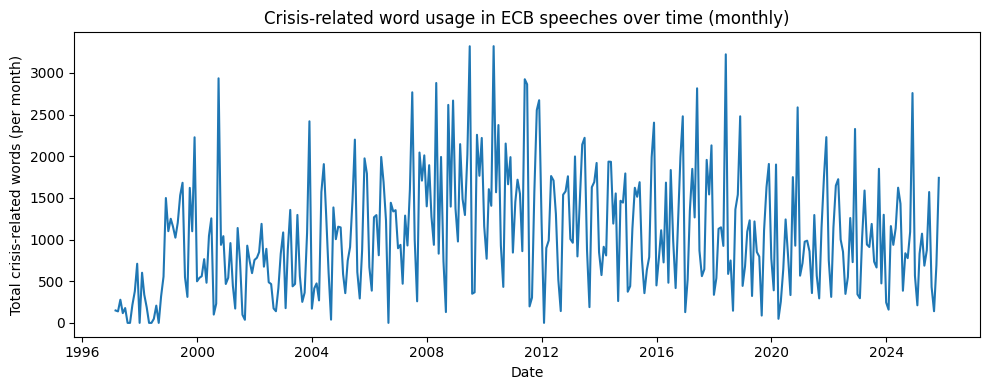

In [150]:
import matplotlib.pyplot as plt

DATE_COL = "date"
df[DATE_COL] = pd.to_datetime(df[DATE_COL])

# set index to date for resampling
df = df.set_index(DATE_COL)

monthly = (
    df["crisis_count"]
    .resample("M")
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,4))
plt.plot(monthly[DATE_COL], monthly["crisis_count"])
plt.xlabel("Date")
plt.ylabel("Total crisis-related words (per month)")
plt.title("Crisis-related word usage in ECB speeches over time (monthly)")
plt.tight_layout()
plt.show()